In [ ]:
THESE ARE SOME NECESSARY LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
DATA PREPROCESSING OR LOADING OF DATA

FOR TRAINING IMAGE PROCESSING

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
VALIDATION IMAGE PROCESSING

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
BUILDING MODEL

In [7]:
cnn = tf.keras.models.Sequential()

In [ ]:
BUILDING CONVOLUTION LAYER

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\utkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [28]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 898s 407ms/step - accuracy: 0.4106 - loss: 2.0937 - val_accuracy: 0.8450 - val_loss: 0.4990
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1021s 465ms/step - accuracy: 0.8355 - loss: 0.5182 - val_accuracy: 0.9062 - val_loss: 0.2976
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1094s 498ms/step - accuracy: 0.9047 - loss: 0.2959 - val_accuracy: 0.9269 - val_loss: 0.2344
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1036s 471ms/step - accuracy: 0.9317 - loss: 0.2061 - val_accuracy: 0.9480 - val_loss: 0.1616
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 877s 399ms/step - accuracy: 0.9527 - loss: 0.1439 - val_accuracy: 0.9527 - val_loss: 0.1510
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1007s 458ms/step - accuracy: 0.9637 - loss: 0.1104 - val_accuracy: 0.9613 - val_loss: 0.1274
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 882s 401ms/step - accuracy: 0.9700 - loss: 0.0905 - val_accuracy: 0.9598 - val_loss: 0.1304
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 882s 402ms/step 

In [ ]:
EVALUATING MODEL

In [30]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 299s 136ms/step - accuracy: 0.9851 - loss: 0.0777
Training accuracy: 0.9862579107284546


In [31]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 64s 117ms/step - accuracy: 0.9612 - loss: 0.1575
Validation accuracy: 0.9596517086029053


In [2]:
#validation accuracy=95%

In [ ]:
SAVING MODEL:-
-----------------------------

In [32]:
cnn.save('trained_plant_disease_model.keras')

In [33]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6067430377006531,
  0.8579415082931519,
  0.9131374955177307,
  0.9386300444602966,
  0.9547194242477417,
  0.9650757312774658,
  0.9716765284538269,
  0.9758588671684265,
  0.9794864654541016,
  0.9823315739631653],
 'loss': [1.3399096727371216,
  0.4456833004951477,
  0.26597148180007935,
  0.1864481270313263,
  0.13730747997760773,
  0.10561133921146393,
  0.08621637523174286,
  0.07374811917543411,
  0.06131202355027199,
  0.05495366454124451],
 'val_accuracy': [0.8449806571006775,
  0.9061574935913086,
  0.9269291758537292,
  0.9480423331260681,
  0.9526519179344177,
  0.9613020420074463,
  0.9597655534744263,
  0.9643182158470154,
  0.968529462814331,
  0.9596517086029053],
 'val_loss': [0.4989546239376068,
  0.29763129353523254,
  0.23436716198921204,
  0.16156677901744843,
  0.15098422765731812,
  0.12744252383708954,
  0.13042254745960236,
  0.11674775183200836,
  0.11083021759986877,
  0.16624659299850464]}

In [34]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [35]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
ACCURACY VISUALISATION:-
-------------------------------

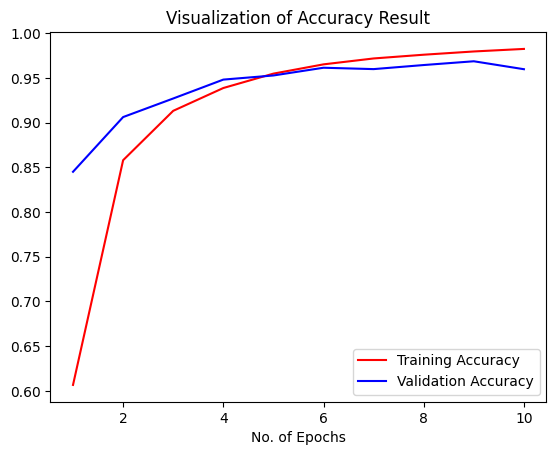

In [36]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
Some other metrics for model evaluation:-
-----------------------------------------------

In [37]:
class_name = validation_set.class_names

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [40]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 196s 11ms/step


In [41]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [42]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [47]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.95      0.94       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.98      0.91      0.94       502
                               Blueberry___healthy       0.94      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.97      0.91       410
                       Corn_(maize)___Common_rust_       0.92      1.00      0.96       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.90      0.

In [ ]:
Confusion Matrix Visualization:-
-----------------------------------------

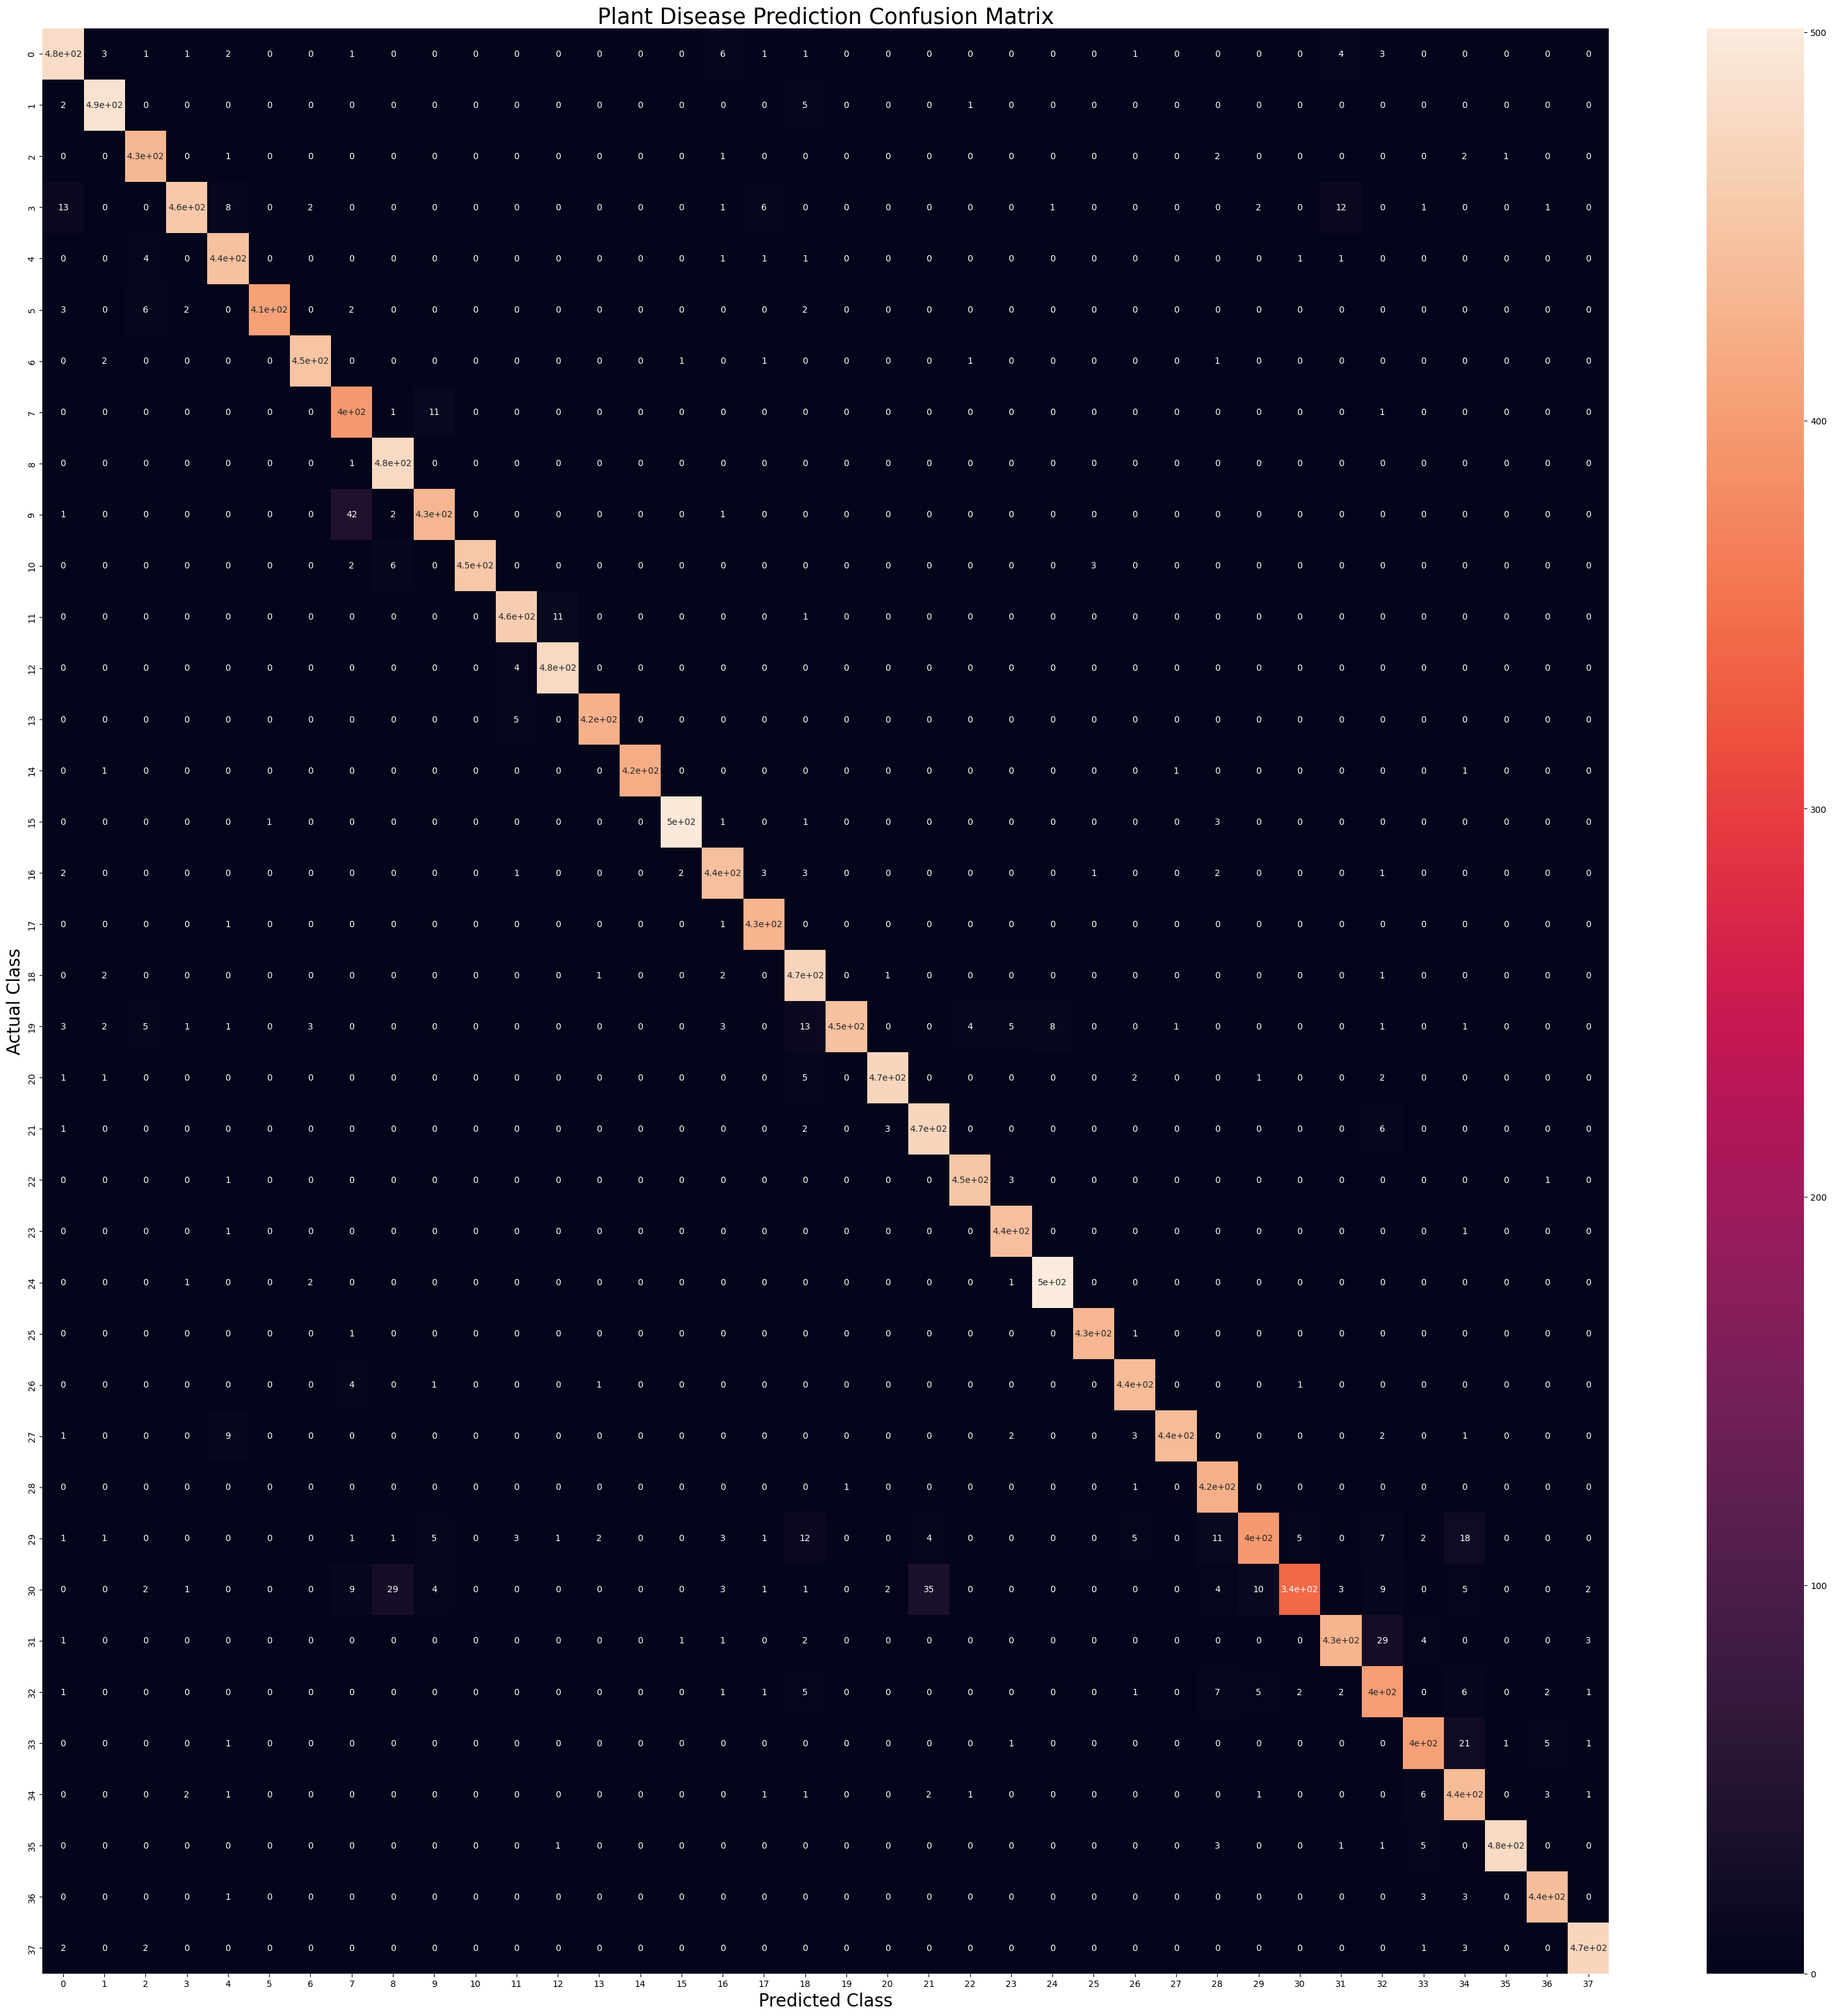

In [48]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()